In [1]:
!pip install tpot
from tpot import TPOTRegressor
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 8.9 MB/s eta 0:00:00
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11954 sha256=836684842ff72839efadeda1e1c7b2eaeced9812204dc549547941e105b59d87
  Stored in directory: /root/.cache/pip/wheels/48/8c/93/3afb1916772591fe6bcc25cdf8b1c5bdc362f0ec8e2f0fd413
Successfully built stopit


In [2]:
#importing data from a local CSV file
from google.colab import files
uploaded = files.upload()

Saving 500s45f6t2g0.01py1+y2-y1+y3-y2+y3.csv to 500s45f6t2g0.01py1+y2-y1+y3-y2+y3.csv


In [3]:
df = pd.read_csv("500s45f6t2g0.01py1+y2-y1+y3-y2+y3.csv")
df.head()
y_col = [
    'Y1',
    'Y2',
    'Y3',
    'Y4',
    'Y5',
    'Y6'
 ]
y = df[y_col]
y.head()
X = df[df.columns.drop(y)]
X.head()


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45
0,0.659063,0.494040,0.335502,0.979386,0.612618,0.002575,0.221960,0.139958,0.703584,0.742041,...,0.521496,0.022851,0.449524,0.486804,0.898213,0.977111,0.574976,0.706232,0.047618,0.333569
1,0.214173,0.191947,0.117951,0.211555,0.100639,0.890179,0.199387,0.791616,0.411719,0.600933,...,0.425209,0.173108,0.004036,0.113434,0.077677,0.202751,0.867966,0.583306,0.837594,0.896740
2,0.550770,0.047189,0.680512,0.246675,0.200797,0.791996,0.583239,0.517456,0.714909,0.612277,...,0.803594,0.622521,0.863715,0.754124,0.003049,0.255611,0.070807,0.816851,0.502387,0.300384
3,0.207015,0.519658,0.847321,0.285827,0.363101,0.642690,0.373372,0.220992,0.935993,0.494794,...,0.000000,0.209202,0.541844,0.683523,0.484890,0.720966,0.982761,0.907497,0.104646,0.200390
4,0.262752,0.057645,0.205471,0.634553,0.702098,0.358256,0.725372,0.497711,0.183862,0.760007,...,0.344406,0.229457,0.317685,0.300469,0.454684,0.275514,0.438555,0.145434,0.666650,0.758423


In [4]:
y.head()

,Y1,Y2,Y3,Y4,Y5,Y6
0,0.275442,0.405374,0.577502,0.263993,0.266845,0.378932
1,0.997173,0.718340,0.574090,1.000000,0.987347,0.707076
2,0.559781,0.570065,0.000000,0.574136,0.321913,0.151362
3,0.553826,0.504050,0.604362,0.537139,0.555944,0.501815
4,0.677921,0.574393,0.638297,0.671747,0.693535,0.599696


In [5]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split( 
                        X, y, test_size = 0.20, random_state = 39)
from sklearn.multioutput import MultiOutputRegressor
rfg = MultiOutputRegressor(RandomForestRegressor(n_estimators=100,criterion='squared_error'))
rfg.fit(X_train, y_train)
y_pred = rfg.predict(X_test)
rfg.score(X_test, y_test)

0.42715236727123856

In [6]:
import math
from sklearn.metrics import  mean_squared_error as morrfr_rmse
from sklearn.metrics import mean_absolute_error as morrfr_mae
morrfr_rmse1=math.sqrt(morrfr_rmse(y_test, y_pred))
print('RMSE for morrfr is',morrfr_rmse1)

morrfr_mae1=morrfr_mae(y_test, y_pred)
print('MAE for morrfr is',morrfr_mae1)

RMSE for morrfr is 0.10712568959814409
MAE for morrfr is 0.07968654102187163


In [7]:
#Running TPOT-MOR using MultiOutputRegressor from SK-Learn
import numpy as np
from tpot import decorators
decorators.MAX_EVAL_SECS = 240
tpotreg = MultiOutputRegressor(TPOTRegressor(warm_start=True ,generations=5, population_size=50, verbosity=2, random_state=39,n_jobs=1, max_time_mins=None, max_eval_time_mins=5,cv=10))
tpotreg.fit(X_train,y_train)
tpotreg.score(X_test, y_test)


import math
from sklearn.metrics import  mean_squared_error as tpotmo_mse
from sklearn.metrics import mean_absolute_error as tpotmo_mae
tpotmo_rmse1=math.sqrt(tpotmo_mse(y_test, y_pred))
print('RMSE for TPOT-MO is',tpotmo_rmse1)

tpotmo_mae1=tpotmo_mae(y_test, y_pred)
print('MAE for TPOT-MO is',tpotmo_mae1)
tpotreg.score(X_test, y_test)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.004199340299301456

Generation 2 - Current best internal CV score: -0.004194360512781502

Generation 3 - Current best internal CV score: -0.004194360512781502

Generation 4 - Current best internal CV score: -0.004194360512781502

Generation 5 - Current best internal CV score: -0.004194360512781502

Best pipeline: LassoLarsCV(input_matrix, normalize=True)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.004642205487374

Generation 2 - Current best internal CV score: -0.004642205487374

Generation 3 - Current best internal CV score: -0.004594236831648879

Generation 4 - Current best internal CV score: -0.004594236831648879

Generation 5 - Current best internal CV score: -0.004594236831648879

Best pipeline: RidgeCV(SelectPercentile(VarianceThreshold(input_matrix, threshold=0.005), percentile=31))


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.005706584982291986

Generation 2 - Current best internal CV score: -0.005706584982291986

Generation 3 - Current best internal CV score: -0.0057065189375402215

Generation 4 - Current best internal CV score: -0.005667350017594634

Generation 5 - Current best internal CV score: -0.005667350017594634

Best pipeline: RidgeCV(SelectPercentile(input_matrix, percentile=54))


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.004612738663848213

Generation 2 - Current best internal CV score: -0.004611346705905013

Generation 3 - Current best internal CV score: -0.004611346705905013

Generation 4 - Current best internal CV score: -0.0046097981489276844

Generation 5 - Current best internal CV score: -0.0046097981489276844

Best pipeline: ElasticNetCV(input_matrix, l1_ratio=0.65, tol=0.001)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.007131762483035599

Generation 2 - Current best internal CV score: -0.007118188247228029

Generation 3 - Current best internal CV score: -0.007118188247228029

Generation 4 - Current best internal CV score: -0.007096391448821604

Generation 5 - Current best internal CV score: -0.007023857986881858

Best pipeline: ElasticNetCV(MinMaxScaler(Normalizer(input_matrix, norm=l2)), l1_ratio=0.25, tol=0.01)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.008543617080126364

Generation 2 - Current best internal CV score: -0.008522701575169513

Generation 3 - Current best internal CV score: -0.008232687944384417

Generation 4 - Current best internal CV score: -0.008232687944384417

Generation 5 - Current best internal CV score: -0.008232687944384417

Best pipeline: LinearSVR(input_matrix, C=0.01, dual=True, epsilon=0.0001, loss=epsilon_insensitive, tol=0.0001)
RMSE for TPOT-MO is 0.10712568959814409
MAE for TPOT-MO is 0.07968654102187163


0.6577710028817628

In [ ]:
from sklearn.svm import LinearSVR
from sklearn.multioutput import MultiOutputRegressor
rfg1 = MultiOutputRegressor(LinearSVR(random_state=39,dual = True,max_iter=1000000))
rfg1.fit(X_train, y_train)
y_pred1 = rfg1.predict(X_test)
rfg1.score(X_test, y_test)

0.6182267415845835

In [ ]:
import math
from sklearn.metrics import mean_absolute_error as morlsvr_mae2
from sklearn.metrics import mean_squared_error as morlsvr_rmse2
morlsvr_rmse1=math.sqrt(morlsvr_rmse2(y_test, y_pred1))
print('RMSE for morlsvr is',morlsvr_rmse1)
morlsvr_mae1=morlsvr_mae2(y_test, y_pred1)
print('MAE for morlsvr is',morlsvr_mae1)

RMSE for morlsvr is 0.0836399534952259
MAE for morlsvr is 0.03055610709999945


In [ ]:
class MultiOutputTP(object):
    def __init__(self, *args, **kwargs):
        self.args = args
        self.kwargs = kwargs
        
    def fit(self, X, y):
        X, y = map(np.atleast_2d, (X, y))
        assert X.shape[0] == y.shape[0]
        Ny = y.shape[1]
        
        self.clfs = []
        for i in range(Ny):
            #clf = GradientBoostingRegressor(**self.kwargs)
            #clf = LinearSVR(max_iter=10000000)
            #clf = LinearSVR(max_iter=500000, **self.kwargs)
            #clf = ExtraTreesRegressor(*self.args, **self.kwargs)
            #clf = RandomForestRegressor(*self.args)
            #clf = TPOTRegressor(*self.args, **self.kwargs)
            clf = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=39,n_jobs=1, max_time_mins=None, max_eval_time_mins=5,cv=10)
            Xi = np.hstack([X, y[:, :i]])
            yi = y[:, i]
            self.clfs.append(clf.fit(Xi, yi))
            
        return self
        
    def predict(self, X):
        y = np.empty([X.shape[0], len(self.clfs)])
        for i, clf in enumerate(self.clfs):
            y[:, i] = clf.predict(np.hstack([X, y[:, :i]]))
        return y

In [ ]:
from tpot import decorators
decorators.MAX_EVAL_SECS = 240
clf2 = MultiOutputTP(50).fit(X_train, y_train)
Ypred2 = clf2.predict(X_test)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.004199340299301456

Generation 2 - Current best internal CV score: -0.004199340299301456

Generation 3 - Current best internal CV score: -0.004185457551466902

Generation 4 - Current best internal CV score: -0.004185457551466902

Generation 5 - Current best internal CV score: -0.0039660975658712665

Best pipeline: ElasticNetCV(StandardScaler(LinearSVR(input_matrix, C=1.0, dual=True, epsilon=0.01, loss=epsilon_insensitive, tol=0.001)), l1_ratio=0.8, tol=0.1)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.004541489528399345

Generation 2 - Current best internal CV score: -0.004541489528399345

Generation 3 - Current best internal CV score: -0.004531546944249247

Generation 4 - Current best internal CV score: -0.004531546944249247

Generation 5 - Current best internal CV score: -0.004531247725041143

Best pipeline: ElasticNetCV(LinearSVR(input_matrix, C=15.0, dual=True, epsilon=0.0001, loss=epsilon_insensitive, tol=0.001), l1_ratio=0.4, tol=0.0001)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.00455886566976431

Generation 2 - Current best internal CV score: -0.004542188650381868

Generation 3 - Current best internal CV score: -0.004542094085521283

Generation 4 - Current best internal CV score: -0.004542094085521283

Generation 5 - Current best internal CV score: -0.004454706089272469

Best pipeline: ExtraTreesRegressor(LassoLarsCV(PCA(input_matrix, iterated_power=9, svd_solver=randomized), normalize=False), bootstrap=False, max_features=0.8500000000000001, min_samples_leaf=6, min_samples_split=18, n_estimators=100)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -1.9486366584315609e-31

Generation 2 - Current best internal CV score: -1.9486366584315609e-31

Generation 3 - Current best internal CV score: -1.9486366584315609e-31

Generation 4 - Current best internal CV score: -1.9486366584315609e-31

Generation 5 - Current best internal CV score: -1.8917832064732503e-31

Best pipeline: LassoLarsCV(SGDRegressor(SelectPercentile(input_matrix, percentile=58), alpha=0.01, eta0=0.01, fit_intercept=False, l1_ratio=0.25, learning_rate=invscaling, loss=epsilon_insensitive, penalty=elasticnet, power_t=50.0), normalize=True)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -3.968898651494884e-31

Generation 2 - Current best internal CV score: -3.968898651494884e-31

Generation 3 - Current best internal CV score: -3.227762290295788e-31

Generation 4 - Current best internal CV score: -3.227762290295788e-31

Generation 5 - Current best internal CV score: -3.227762290295788e-31

Best pipeline: LassoLarsCV(VarianceThreshold(input_matrix, threshold=0.005), normalize=True)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -5.27144840630772e-31

Generation 2 - Current best internal CV score: -5.241172787581953e-31

Generation 3 - Current best internal CV score: -2.9350257535737892e-31

Generation 4 - Current best internal CV score: -2.9350257535737892e-31

Generation 5 - Current best internal CV score: -2.9350257535737892e-31

Best pipeline: LassoLarsCV(StandardScaler(input_matrix), normalize=False)


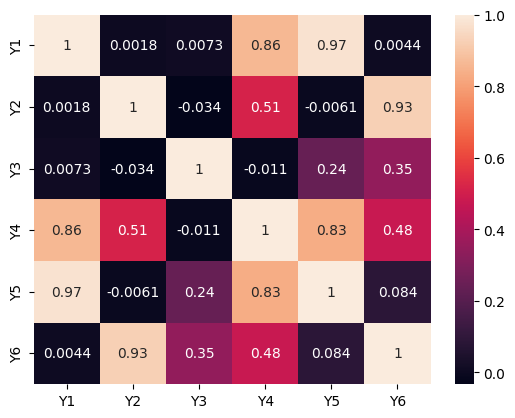

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
# taking all rows but only 6 columns
df_small = y_test.iloc[:,:6]
correlation_mat = df_small.corr(method='pearson')
sns.heatmap(correlation_mat, annot = True)
plt.show()

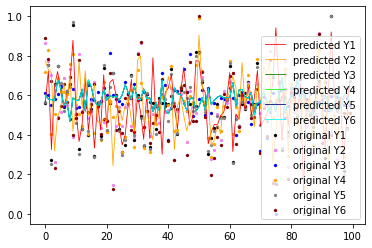

In [ ]:
X_ax = range(len(X_test))
#plt.scatter(y_test[:, 0],y_test[:, 1],y_test[:, 2], s=5, color="blue", label="original")
plt.scatter(X_ax, y_test.iloc[:,0], color="black", s=10,linewidth=0.1,label="original Y1")
plt.scatter(X_ax, y_test.iloc[:,1], color="violet", s=10,linewidth=0.1,label="original Y2")
plt.scatter(X_ax, y_test.iloc[:,2], color="blue", s=10,linewidth=0.1,label="original Y3")
plt.scatter(X_ax, y_test.iloc[:,3], color="orange", s=10,linewidth=0.1,label="original Y4")
plt.scatter(X_ax, y_test.iloc[:,4], color="gray", s=10,linewidth=0.1,label="original Y5")
plt.scatter(X_ax, y_test.iloc[:,5], color="maroon", s=10,linewidth=0.1,label="original Y6")


plt.plot(X_ax, Ypred2[:,0], lw=0.8, color="red", label="predicted Y1")
plt.plot(X_ax, Ypred2[:,1], lw=0.8, color="orange", label="predicted Y2")
plt.plot(X_ax, Ypred2[:,2], lw=0.8, color="green", label="predicted Y3")
plt.plot(X_ax, Ypred2[:,2], lw=0.8, color="lime", label="predicted Y4")
plt.plot(X_ax, Ypred2[:,2], lw=0.8, color="navy", label="predicted Y5")
plt.plot(X_ax, Ypred2[:,2], lw=0.8, color="aqua", label="predicted Y6")
plt.legend()
plt.show()

In [ ]:
rmse = np.sqrt(((Ypred2 - y_test) ** 2).mean())
#rmse = sqrt(mean_squared_error(y_test, Ypred2))
#rmse
print("rmse: ",rmse)

from statistics import mean
arrmse = mean(rmse)
print("arrmse: ",arrmse)
from sklearn.metrics import mean_absolute_error as mae
mae = mae(y_test, Ypred2)
print("Mean absolute error : ",mae)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, Ypred2)
print("R2: ",r2)
from sklearn.metrics import mean_squared_error
from math import sqrt
RMSE = sqrt(mean_squared_error(y_test, Ypred2))
#RMSE2 = sqrt(mean_squared_error(Ytest, Ypred2))

print('RMSE for Ypred2 is',RMSE)
#print('RMSE for Ypred2 is',RMSE2)

rmse:  Y1    0.069510
Y2    0.070313
Y3    0.083611
Y4    0.061857
Y5    0.083922
Y6    0.096008
dtype: float64
arrmse:  0.07753683067572205
Mean absolute error :  0.048853632246706497
R2:  0.6596957304296311
RMSE for Ypred2 is 0.07837206278146927
